In [68]:
# Initial setup:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 1

#For fancy plots
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import numpy as np
#from numpy import random
#np.random.seed(42) # Set seed for reproducibility

from scipy.stats import  gamma, chi2
from scipy.special import erfcinv
from scipy.linalg import sqrtm

import getdist
from getdist import plots, MCSamples
getdist.chains.print_load_details = False

import git, os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
def calculate_R_CM(vectors):
    num_vectors = len(vectors)
    R_CM = np.sum(vectors, axis=0) / num_vectors
    return R_CM

def beta_statistic(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3):
    """
    Calculate the beta parameter for the given distributions.
    
    Parameters:
    diff_mean_1, diff_mean_2, diff_mean_3: Mean differences for each distribution.
    cov_1, cov_2, cov_3: Covariance matrices for each distribution.
    
    Returns:
    beta: The beta parameter.
    """
    
    beta = np.dot(diff_mean_1, np.linalg.solve(cov_1, diff_mean_1)) + \
           np.dot(diff_mean_2, np.linalg.solve(cov_2, diff_mean_2)) + \
           np.dot(diff_mean_3, np.linalg.solve(cov_3, diff_mean_3))
           
    
    return beta

'''
def Q_tot(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3, n_samples, L):
    
    # Sampling
    X = np.dot(sqrtm(np.linalg.inv(cov_1)), np.random.multivariate_normal(0*diff_mean_1, cov_1, size=n_samples).T)  # Shape: (d, n_samples)
    Y = np.dot(sqrtm(np.linalg.inv(cov_2)), np.random.multivariate_normal(0*diff_mean_2, cov_2, size=n_samples).T)  # Shape: (d, n_samples)
    Z = np.dot(sqrtm(np.linalg.inv(cov_3)), np.random.multivariate_normal(0*diff_mean_3, cov_3, size=n_samples).T)  # Shape: (d, n_samples)

    r_tot = X + Y + Z

    # Compute W for each sample
    Q = np.zeros(n_samples)  # Initialize W
    for i in range(n_samples):
        Q[i] = np.dot(r_tot[:, i], r_tot[:, i])  # Shape: (n_samples,)

    return Q / L**2
'''


'\ndef Q_tot(diff_mean_1, diff_mean_2, diff_mean_3, cov_1, cov_2, cov_3, n_samples, L):\n    \n    # Sampling\n    X = np.dot(sqrtm(np.linalg.inv(cov_1)), np.random.multivariate_normal(0*diff_mean_1, cov_1, size=n_samples).T)  # Shape: (d, n_samples)\n    Y = np.dot(sqrtm(np.linalg.inv(cov_2)), np.random.multivariate_normal(0*diff_mean_2, cov_2, size=n_samples).T)  # Shape: (d, n_samples)\n    Z = np.dot(sqrtm(np.linalg.inv(cov_3)), np.random.multivariate_normal(0*diff_mean_3, cov_3, size=n_samples).T)  # Shape: (d, n_samples)\n\n    r_tot = X + Y + Z\n\n    # Compute W for each sample\n    Q = np.zeros(n_samples)  # Initialize W\n    for i in range(n_samples):\n        Q[i] = np.dot(r_tot[:, i], r_tot[:, i])  # Shape: (n_samples,)\n\n    return Q / L**2\n'

# Real Data

In [70]:
# Create the two toy chains and the joint chain:
path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
os.chdir(os.path.join(path_git, 'multimeter', 'source'))

'''
A: CC 
B: Planck18 
C: BAO 
D: PPS
'''

chain_A = getdist.mcsamples.loadMCSamples(file_root='lcdm_cc/2023-09-18_1000000_', no_cache=True,settings={'loglikes':True,'label':'CC','ignore_rows': '0.3'})
chain_B = getdist.mcsamples.loadMCSamples(file_root='lcdm_planck/2023-09-16_1000000_', no_cache=True,settings={'loglikes':True,'label':'Planck18','ignore_rows': '0.3'})
chain_C = getdist.mcsamples.loadMCSamples(file_root='lcdm_bao_plus/2024-03-07_1000000_', no_cache=True,settings={'label':'BAO','ignore_rows': '0.3'})
chain_D = getdist.mcsamples.loadMCSamples(file_root='lcdm_pps/2023-09-18_1000000_', no_cache=True,settings={'label':'PPS','ignore_rows': '0.3'})

param_names = ['Omega_m','H0'] #Shared paameters
names=param_names
labels=param_names

#Estimate the mean and covariance of the chains:
mean_A = chain_A.mean(param_names)
cov_A = chain_A.cov(param_names)
mean_B = chain_B.mean(param_names)
cov_B = chain_B.cov(param_names)
mean_C = chain_C.mean(param_names)
cov_C = chain_C.cov(param_names)
mean_D = chain_D.mean(param_names)
cov_D = chain_D.cov(param_names)


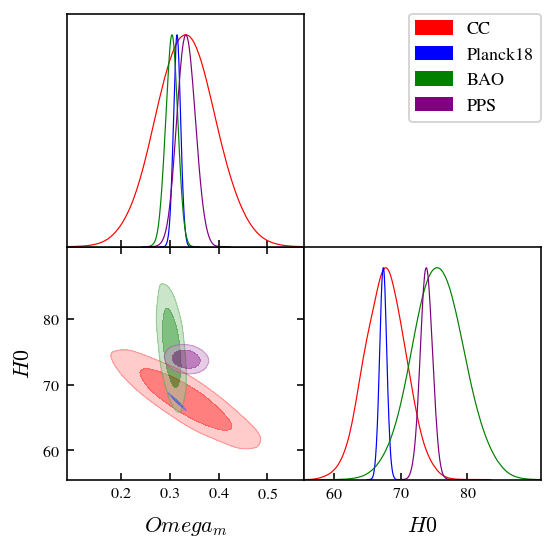

In [71]:
samps_A = np.random.multivariate_normal(mean_A, cov_A, size=10000)
samps_B = np.random.multivariate_normal(mean_B, cov_B, size=10000)
samps_C = np.random.multivariate_normal(mean_C, cov_C, size=10000)
samps_D = np.random.multivariate_normal(mean_D, cov_D, size=10000)

chain_A = MCSamples(samples=samps_A, names=names, labels=labels, label='Dataset A')
chain_B = MCSamples(samples=samps_B, names=names, labels=labels, label='Dataset B')
chain_C = MCSamples(samples=samps_C, names=names, labels=labels, label='Dataset C')
chain_D = MCSamples(samples=samps_D, names=names, labels=labels, label='Dataset D')

colors = ['red', 'blue', 'green', 'purple']


g = plots.get_subplot_plotter()
g.triangle_plot([chain_A, chain_B, chain_C, chain_D],\
                filled=True, contour_args={'alpha':0.5},\
                contour_colors=colors,
                legend_labels=['CC', 'Planck18', 'BAO', 'PPS'])
os.chdir(os.path.join(path_git, 'multimeter', 'source'))
g.export('dist_data.png')

In [72]:
cov_1 = cov_A + cov_B
cov_2 = cov_A + cov_C
cov_3 = cov_B + cov_C
cov_4 = cov_A + cov_D
cov_5 = cov_B + cov_D
cov_6 = cov_C + cov_D

diff_mean_1 = mean_A - mean_B
diff_mean_2 = mean_A - mean_C
diff_mean_3 = mean_B - mean_C
diff_mean_4 = mean_A - mean_D
diff_mean_5 = mean_B - mean_D
diff_mean_6 = mean_C - mean_D

r_1 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_B)), (mean_A - mean_B)) #CC/Planck18
r_2 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_C)), (mean_A - mean_C)) #CC/BAO
r_3 = np.dot(sqrtm(np.linalg.inv(cov_B + cov_C)), (mean_B - mean_C)) #Planck18/BAO
r_4 = np.dot(sqrtm(np.linalg.inv(cov_A + cov_D)), (mean_A - mean_D)) #CC/PPS
r_5 = np.dot(sqrtm(np.linalg.inv(cov_B + cov_D)), (mean_B - mean_D)) #Planck18/PPS
r_6 = np.dot(sqrtm(np.linalg.inv(cov_C + cov_D)), (mean_C - mean_D)) #BAO/PPS


'''
A: CC 
B: Planck18 
C: BAO 
D: PPS
'''

'\nA: CC \nB: Planck18 \nC: BAO \nD: PPS\n'

In [73]:
# Fixed constants
# Parameters
d = 2  # Dimension
N = 3  # Number of datasets
L = N*(N-1)/2  # Number of tension vectors

## Without CC

Center of mass: [-1.43948076 -2.5657234 ]
PTE = 2.300090376229999e-06
$N_\sigma_Q$ = 4.7250939104151195
PTE = 2.6033366412524223e-09
$N_\sigma_beta$ = 5.954835429006032


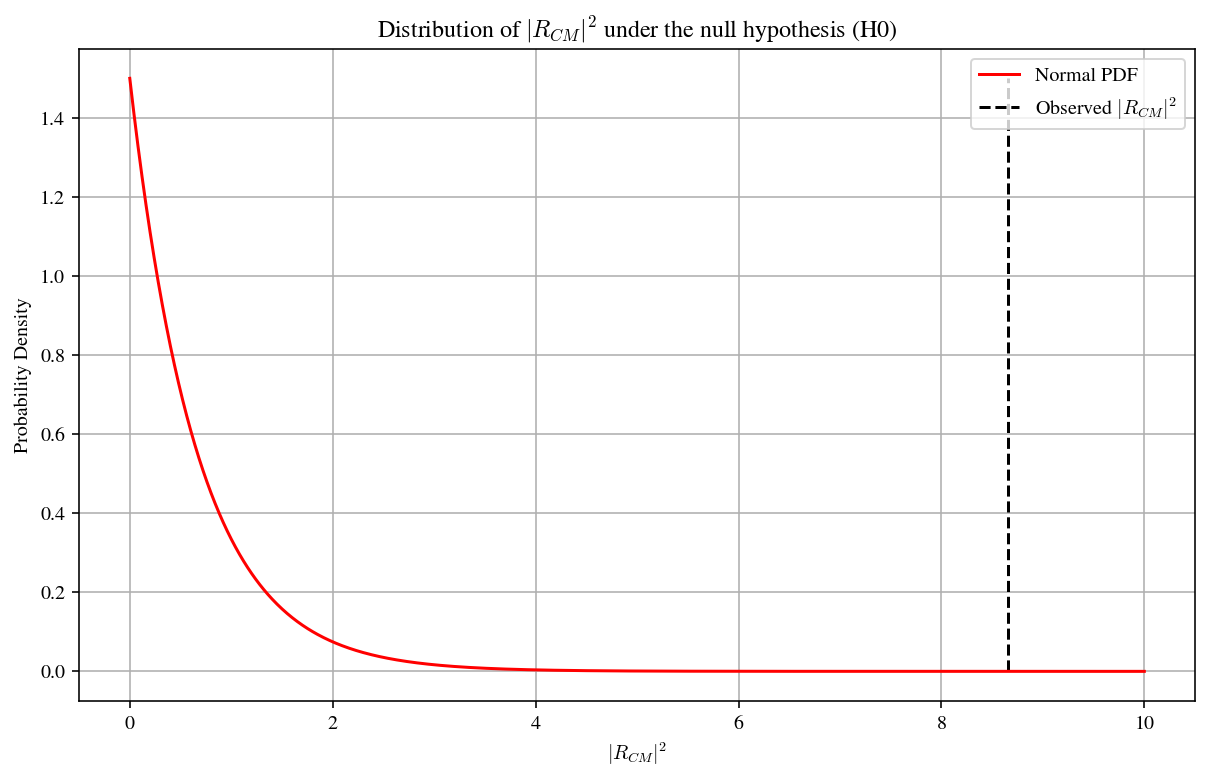

In [74]:
# Example usage:
vectors = np.array([r_3, r_5, r_6])
R_CM = calculate_R_CM(vectors)
print('Center of mass: {}'.format(R_CM))

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_Q$ = {n_sigma}')

PTE = chi2(d*N).sf(beta_statistic(diff_mean_3, diff_mean_5,
                                  diff_mean_6, cov_3, cov_5, cov_6))
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_beta$ = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 10, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

## Without Planck18

Center of mass: [-1.4708069  -1.02614098]
PTE = 0.008031713623330088
$N_\sigma_Q$ = 2.650733717651711
PTE = 0.020501277603303395
$N_\sigma_beta$ = 2.317045054553016


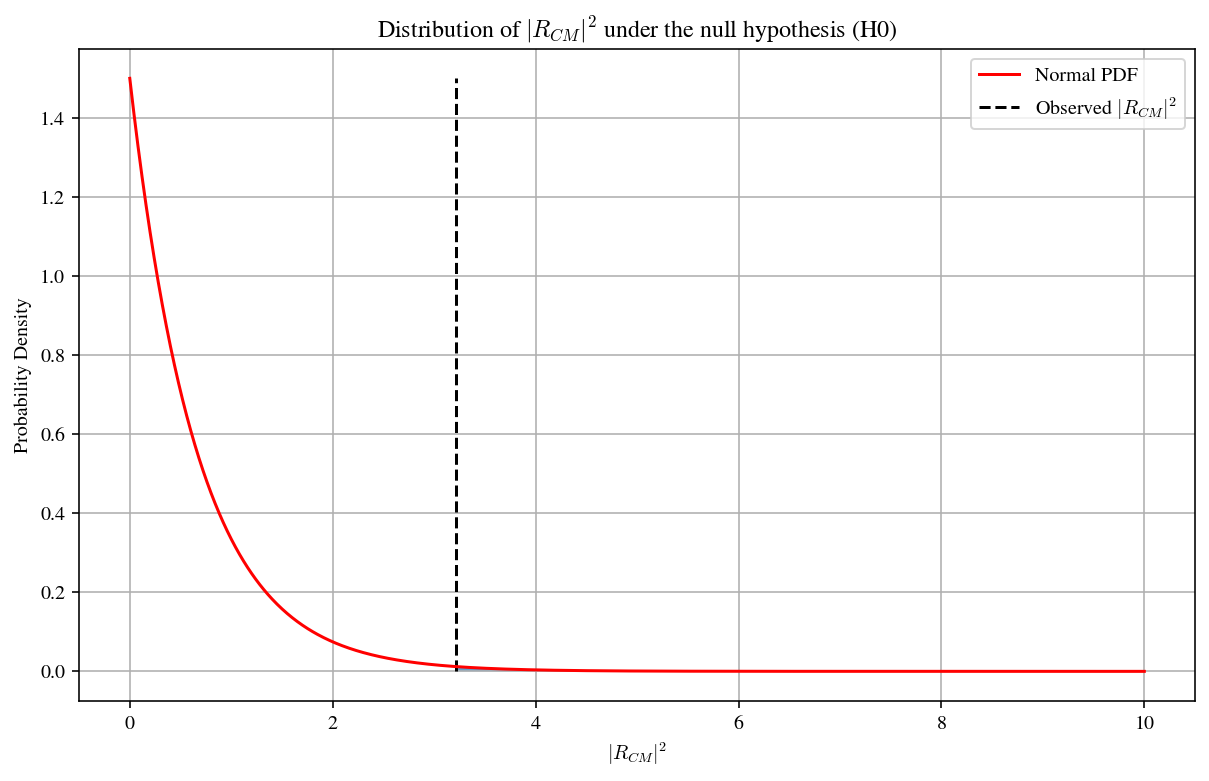

In [75]:
# Example usage:
vectors = np.array([r_2, r_4, r_6])
R_CM = calculate_R_CM(vectors)
print('Center of mass: {}'.format(R_CM))

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_Q$ = {n_sigma}')

PTE = chi2(d*N).sf(beta_statistic(diff_mean_2, diff_mean_4,
                                  diff_mean_6, cov_2, cov_4, cov_6))
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_beta$ = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 10, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

## Without BAO

Center of mass: [-1.57146935 -2.63888797]
PTE = 7.157975659235183e-07
$N_\sigma_Q$ = 4.957027749302273
PTE = 2.647762313178543e-10
$N_\sigma_beta$ = 6.318113090267893


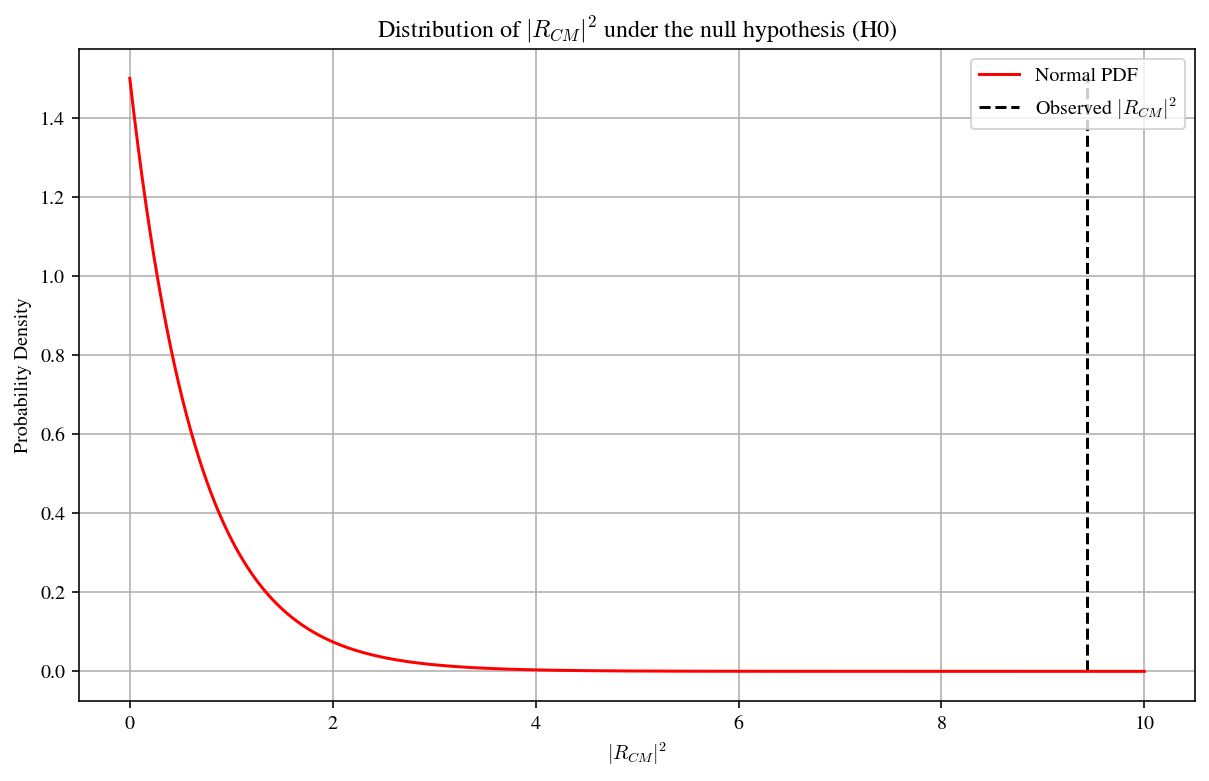

In [76]:
# Example usage:
vectors = np.array([r_1, r_4, r_5])
R_CM = calculate_R_CM(vectors)
print('Center of mass: {}'.format(R_CM))

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_Q$ = {n_sigma}')

PTE = chi2(d*N).sf(beta_statistic(diff_mean_1, diff_mean_4,
                                  diff_mean_5, cov_1, cov_4, cov_5))
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_beta$ = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 10, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

## Without PPS

Center of mass: [-0.00930819 -1.16615838]
PTE = 0.1300263670673532
$N_\sigma_Q$ = 1.5139979198760019
PTE = 0.2749458936224471
$N_\sigma_beta$ = 1.091743422026327


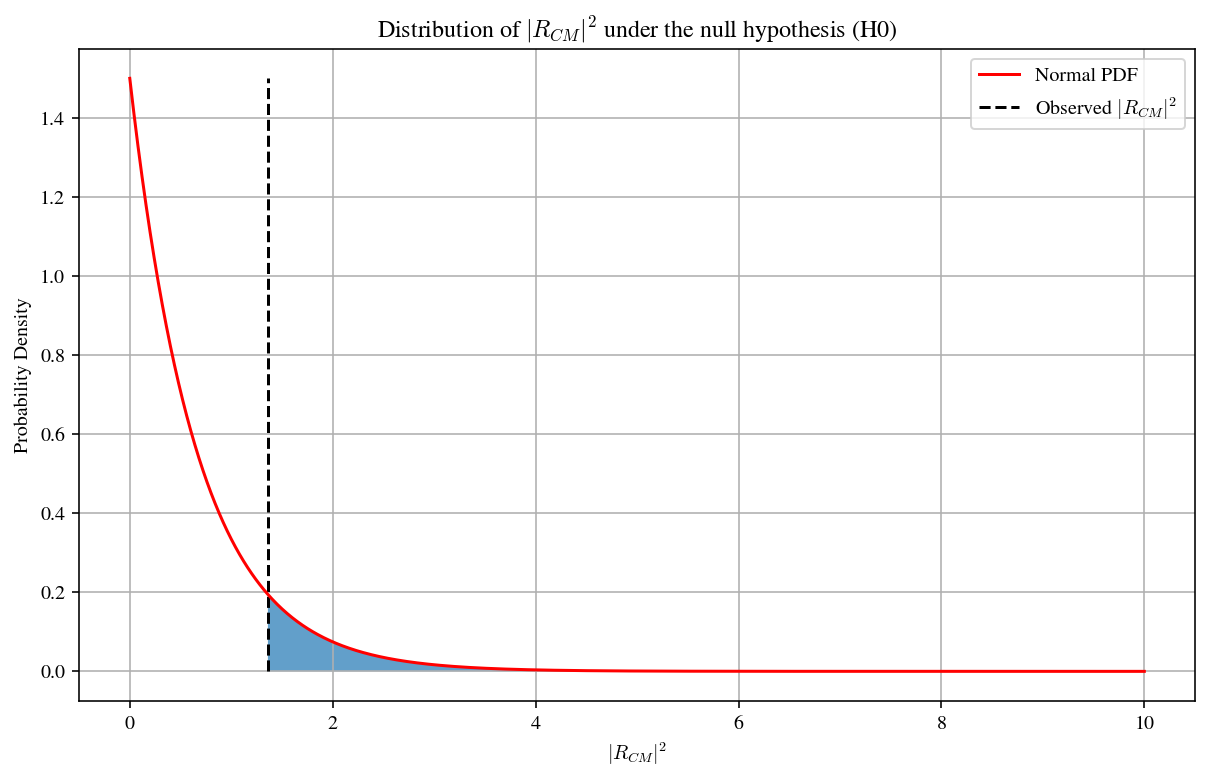

In [77]:
# Example usage:
vectors = np.array([r_1, r_2, r_3])
R_CM = calculate_R_CM(vectors)
print('Center of mass: {}'.format(R_CM))

PTE = gamma(a=d/2, scale=2/L).sf(np.linalg.norm(R_CM)**2)
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_Q$ = {n_sigma}')

PTE = chi2(d*N).sf(beta_statistic(diff_mean_1, diff_mean_2,
                                  diff_mean_3, cov_1, cov_2, cov_3))
n_sigma = np.sqrt(2)*erfcinv(PTE)
print(f'PTE = {PTE}')
print(f'$N_\sigma_beta$ = {n_sigma}')

# Plot histogram
plt.figure(figsize=(10, 6))
t=np.linspace(0, 10, 1000)
plt.plot(t, gamma.pdf(t,a=d/2, scale=2/L), color='red', label='Normal PDF')
plt.fill_between(t[t >= np.linalg.norm(R_CM)**2], 0, gamma.pdf(t[t >= np.linalg.norm(R_CM)**2], a=d/2, scale=2/L), alpha=0.7)
plt.vlines(x=np.linalg.norm(R_CM)**2, ymin=0, ymax=gamma.pdf(0,a=d/2, scale=2/L), color='black', linestyle='--', label='Observed $|R_{CM}|^2$')
plt.title('Distribution of $|R_{CM}|^2$ under the null hypothesis (H0)')
plt.xlabel('$|R_{CM}|^2$')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

Los que mas tensionan son PPS (obvio) y Planck18 (porque tiene una covarianza muy chica y tensiona fuerte con BAO y PPS). BAO podria tensionar mas si tuviese una covarianza mas chica.